In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math
import datetime as dt
import calendar
import colorcet as cc

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Dataset
CASH_FLOW = pd.read_csv('TEMP/CASH_FLOW_CLEANED.csv')
CASH_FLOW.head()

,Date,Year,Month,Week,Day,Category,Item,Vendor,Vendor Location,District,Income/Expenses,Amount
0,2019-05-28,2019,5,W22,Tuesday,Telephone,Top Up Singtel Card,7-Eleven,Blank,Clementi,Expenses,10.0
1,2019-05-28,2019,5,W22,Tuesday,Gift,Gift,Blank,Blank,Blank,Expenses,15.3
2,2019-05-28,2019,5,W22,Tuesday,Drinks,Bubble Tea,Koi,Takashimaya,Orchard,Expenses,1.8
3,2019-05-28,2019,5,W22,Tuesday,Gift,Gift,Blank,Blank,Blank,Expenses,32.0
4,2019-05-28,2019,5,W22,Tuesday,Food,Korean BBQ,I Am Kim,Blank,Rochor,Expenses,15.0


In [3]:
# Dataset Description
CASH_FLOW.describe()

,Year,Month,Amount
count,622.000000,622.000000,622.000000
mean,2018.704180,5.546624,12.993328
std,0.456778,3.999627,36.811177
min,2018.000000,1.000000,0.300000
25%,2018.000000,3.000000,3.200000
50%,2019.000000,4.000000,4.000000
75%,2019.000000,11.000000,6.000000
max,2019.000000,12.000000,400.000000


In [4]:
# Dataset Information
CASH_FLOW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             622 non-null    object 
 1   Year             622 non-null    int64  
 2   Month            622 non-null    int64  
 3   Week             622 non-null    object 
 4   Day              622 non-null    object 
 5   Category         622 non-null    object 
 6   Item             622 non-null    object 
 7   Vendor           622 non-null    object 
 8   Vendor Location  622 non-null    object 
 9   District         622 non-null    object 
 10  Income/Expenses  622 non-null    object 
 11  Amount           622 non-null    float64
dtypes: float64(1), int64(2), object(9)
memory usage: 58.4+ KB


<h2>Data Visualization</h2>

In [5]:
CASH_FLOW["Date"] = [dt.datetime.strptime(date,'%d/%m/%Y').date() for date in CASH_FLOW["Date"]]
CASH_FLOW["Date"]

ValueError: time data '2019-05-28' does not match format '%d/%m/%Y'

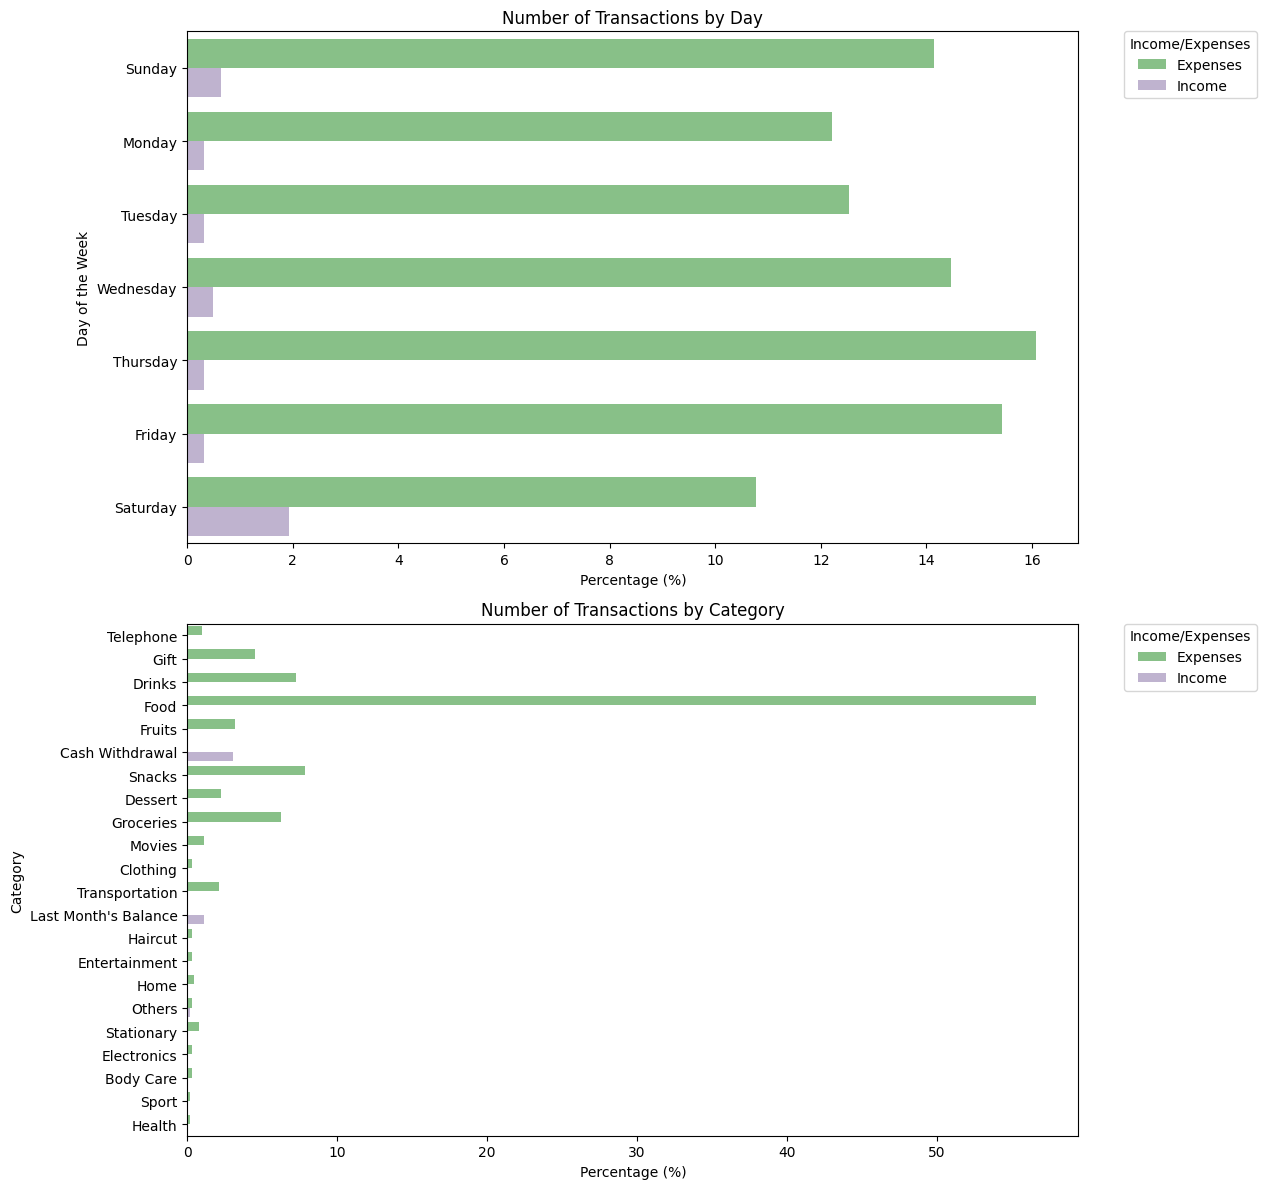

In [ ]:
# Number of Transactions by Day in %
DAY_SORTED = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(13, 12))

CASH_FLOW_PERCENT_DAY_COUNTPLOT = sns.countplot(
    y = "Day", 
    hue = "Income/Expenses",
    order = DAY_SORTED, 
    data = CASH_FLOW, 
    palette = "Accent",
    stat = "percent",
    ax = ax[0]
)

CASH_FLOW_PERCENT_DAY_COUNTPLOT.set(
    xlabel = "Percentage (%)",
    ylabel = "Day of the Week",
    title = "Number of Transactions by Day"
)

CASH_FLOW_PERCENT_DAY_COUNTPLOT.legend(
    bbox_to_anchor = (1.2, 1),
    loc = "upper right",
    borderaxespad = 0,
    title = "Income/Expenses"
)

# Number of Transactions by Category in %
CASH_FLOW_PERCENT_CATEGORY_COUNTPLOT = sns.countplot(
    y = "Category", 
    hue = "Income/Expenses",
    data = CASH_FLOW, 
    palette = "Accent",
    stat = "percent",
    ax = ax[1]
)

CASH_FLOW_PERCENT_CATEGORY_COUNTPLOT.set(
    xlabel = "Percentage (%)",
    ylabel = "Category",
    title = "Number of Transactions by Category"
)


CASH_FLOW_PERCENT_CATEGORY_COUNTPLOT.legend(
    bbox_to_anchor = (1.2, 1),
    loc = "upper right",
    borderaxespad = 0,
    title = "Income/Expenses"
)

fig.tight_layout()

In [ ]:
# Data Frame Split 1: Expenses
CASH_FLOW_EXPENSES = CASH_FLOW[CASH_FLOW['Income/Expenses'] == "Expenses"]
CASH_FLOW_EXPENSES.head(10)

,Date,Year,Month,Week,Day,Category,Item,Vendor,Vendor Location,District,Income/Expenses,Amount
0,2019-05-28,2019,5,W22,Tuesday,Telephone,Top Up Singtel Card,7-Eleven,Blank,Clementi,Expenses,10.0
1,2019-05-28,2019,5,W22,Tuesday,Gift,Gift,Blank,Blank,Blank,Expenses,15.3
2,2019-05-28,2019,5,W22,Tuesday,Drinks,Bubble Tea,Koi,Takashimaya,Orchard,Expenses,1.8
3,2019-05-28,2019,5,W22,Tuesday,Gift,Gift,Blank,Blank,Blank,Expenses,32.0
4,2019-05-28,2019,5,W22,Tuesday,Food,Korean BBQ,I Am Kim,Blank,Rochor,Expenses,15.0
5,2019-05-28,2019,5,W22,Tuesday,Gift,Gift,Blank,Blank,Blank,Expenses,8.3
6,2019-05-27,2019,5,W22,Monday,Gift,Gift,Blank,Blank,Blank,Expenses,8.3
7,2019-05-27,2019,5,W22,Monday,Fruits,Juice,Boost Juice Bars,Bugis Junction,Bugis,Expenses,3.0
8,2019-05-27,2019,5,W22,Monday,Food,Fried Seafood Hor Fun,Food Junction,Bugis Junction,Bugis,Expenses,6.5
10,2019-05-27,2019,5,W22,Monday,Snacks,Snacks,Old Chang Kee,Clementi Mall,Clementi,Expenses,5.2


In [ ]:
# Data Frame Split 2: Income
CASH_FLOW_INCOME = CASH_FLOW[CASH_FLOW['Income/Expenses'] == "Income"]
CASH_FLOW_INCOME.head(10)

,Date,Year,Month,Week,Day,Category,Item,Vendor,Vendor Location,District,Income/Expenses,Amount
9,2019-05-27,2019,5,W22,Monday,Cash Withdrawal,Cash Withdrawal,Blank,Blank,Blank,Income,100.0
50,2019-05-15,2019,5,W20,Wednesday,Cash Withdrawal,Cash Withdrawal,Blank,Blank,Blank,Income,200.0
81,2019-05-04,2019,5,W18,Saturday,Cash Withdrawal,Cash Withdrawal,Blank,Blank,Blank,Income,200.0
96,2019-05-01,2019,5,W18,Wednesday,Last Month's Balance,April's Balance,Blank,Blank,Blank,Income,215.8
116,2019-04-21,2019,4,W16,Sunday,Cash Withdrawal,Cash Withdrawal,Blank,Blank,Blank,Income,200.0
142,2019-04-14,2019,4,W15,Sunday,Cash Withdrawal,Cash Withdrawal,Blank,Blank,Blank,Income,200.0
169,2019-04-03,2019,4,W14,Wednesday,Cash Withdrawal,Cash Withdrawal,Blank,Blank,Blank,Income,200.0
177,2019-04-01,2019,4,W14,Monday,Last Month's Balance,March's Balance,Blank,Blank,Blank,Income,115.3
199,2019-03-23,2019,3,W12,Saturday,Cash Withdrawal,Cash Withdrawal,Blank,Blank,Blank,Income,100.0
234,2019-03-14,2019,3,W11,Thursday,Cash Withdrawal,Cash Withdrawal,Blank,Blank,Blank,Income,200.0


In [ ]:
CASH_FLOW_EXPENSES_CATEGORY = CASH_FLOW_EXPENSES.reset_index().pivot_table(index = "Date", columns = "Category", values = "Amount", aggfunc='sum').fillna(0)
CASH_FLOW_EXPENSES_CATEGORY

Category,Body Care,Clothing,Dessert,Drinks,Electronics,Entertainment,Food,Fruits,Gift,Groceries,Haircut,Health,Home,Movies,Others,Snacks,Sport,Stationary,Telephone,Transportation
Date,,,,,,,,,,,,,,,,,,,,
2018-10-28,0.0,0.0,0.0,0.0,0.0,0.0,4.7,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-29,0.0,0.0,0.0,0.0,0.0,0.0,8.6,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-30,0.0,0.0,0.0,0.0,0.0,0.0,3.8,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.0,0.0
2018-10-31,0.0,0.0,0.0,0.0,0.0,0.0,8.1,2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,0.0,0.0,50.0
2018-11-01,0.0,0.0,0.0,0.0,0.0,0.0,9.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-24,0.0,0.0,3.9,2.7,0.0,0.0,10.8,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,0.0,0.0,0.0,0.0
2019-05-25,0.0,0.0,0.0,4.0,0.0,0.0,9.7,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-26,0.0,0.0,0.0,0.0,0.0,0.0,14.6,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


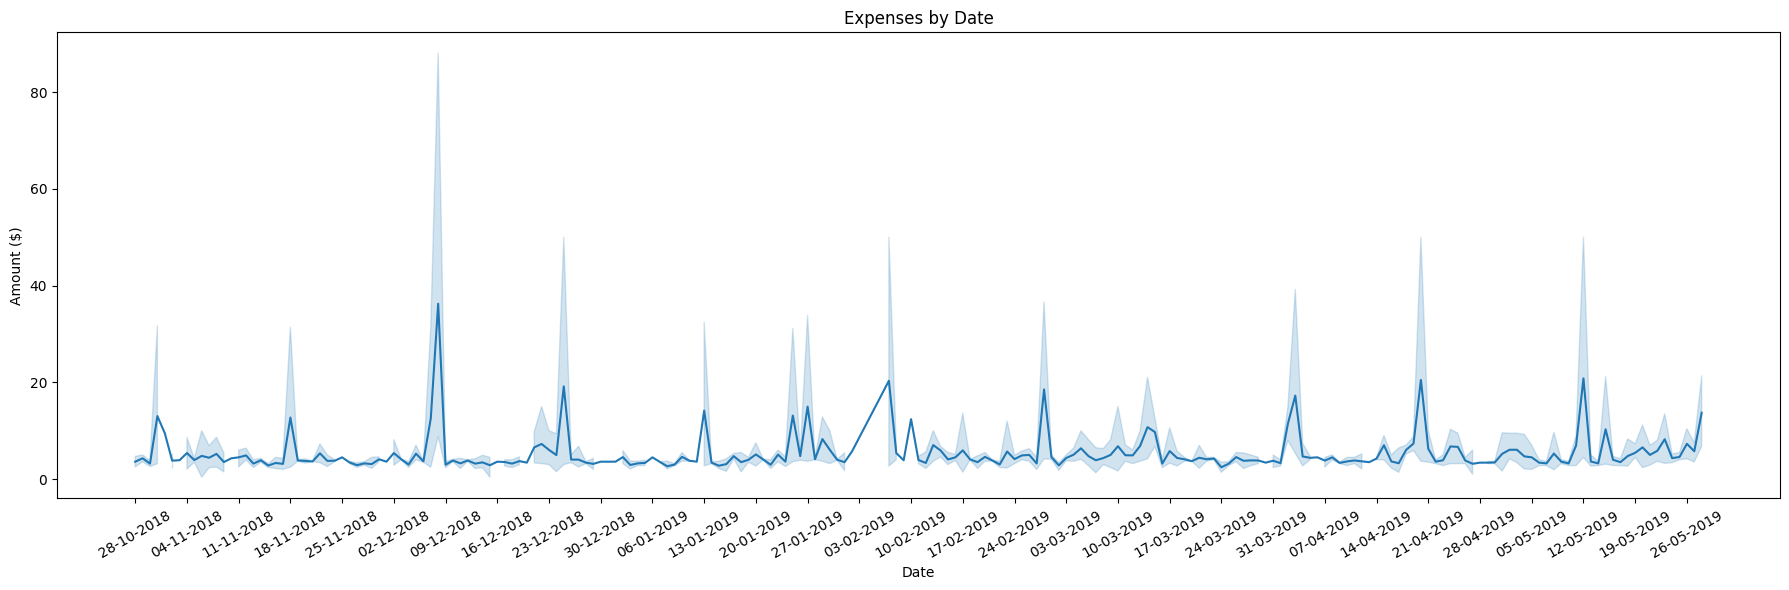

In [ ]:
# Day-to-Day Expenses Distribution --> double plot --> line + histogram
fig, ax = plt.subplots(figsize=(18,6))

plt.xticks(np.arange(start = min(CASH_FLOW_EXPENSES["Date"]), stop = max(CASH_FLOW_EXPENSES["Date"]), step = 7), rotation = 30)

CASH_FLOW_EXPENSES_LINEPLOT = sns.lineplot(data = CASH_FLOW_EXPENSES, x = "Date", y = "Amount", markers = True)

CASH_FLOW_EXPENSES_LINEPLOT.set(
    xlabel = "Date",
    ylabel = "Amount ($)",
    title = "Expenses by Date"
)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))

fig.tight_layout()

In [ ]:
CASH_FLOW_EXPENSES['Category'].unique()

array(['Telephone', 'Gift', 'Drinks', 'Food', 'Fruits', 'Snacks',
       'Dessert', 'Groceries', 'Movies', 'Clothing', 'Transportation',
       'Haircut', 'Entertainment', 'Home', 'Others', 'Stationary',
       'Electronics', 'Body Care', 'Sport', 'Health'], dtype=object)

C:\Users\Ferdy Arianto Wiyogo\AppData\Local\Temp\ipykernel_33896\1845111270.py:19: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend(


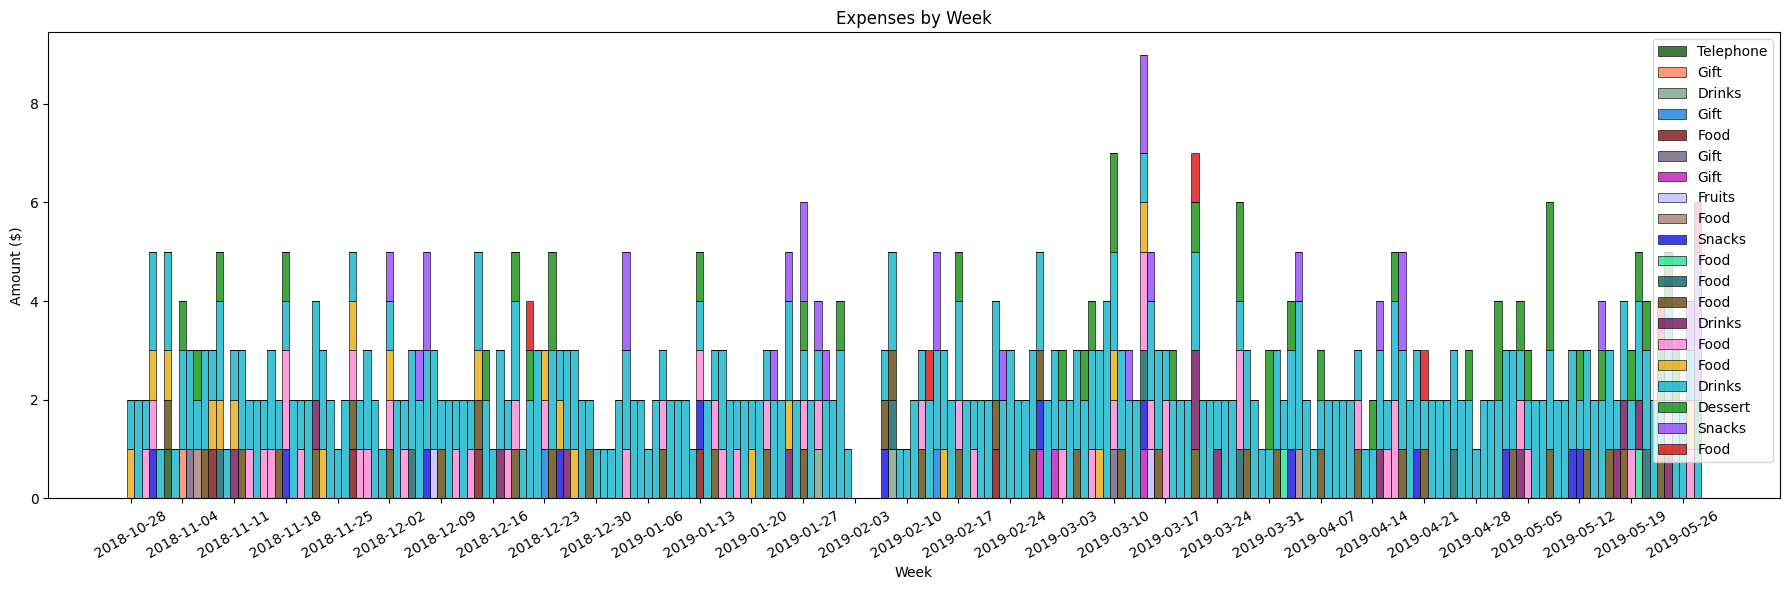

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))

CATEGORY_PALETTE = sns.color_palette(cc.glasbey_dark, n_colors = 20)

CASH_FLOW_EXPENSES_HIST = sns.histplot(
    data = CASH_FLOW_EXPENSES, 
    x = "Date", 
    hue = "Category", 
    palette = CATEGORY_PALETTE, 
    multiple = "stack"
)

CASH_FLOW_EXPENSES_HIST.set(
    xlabel = "Week",
    ylabel = "Amount ($)",
    title = "Expenses by Week"
)

ax.legend(
    handles = [CASH_FLOW_EXPENSES_HIST],
    labels = CASH_FLOW_EXPENSES['Category'].unique().all(),
    bbox_to_anchor = (1.1, 1),
    loc = "upper right",
    borderaxespad = 0,
    title = "Category"
)

ax.legend(CASH_FLOW_EXPENSES['Category'])

plt.xticks(np.arange(start = min(CASH_FLOW_EXPENSES["Date"]), stop = max(CASH_FLOW_EXPENSES["Date"]), step = 7), rotation = 30)

# ax.xaxis.set_major_formatter(mdates.DateFormatter("%U-%Y"))

fig.tight_layout()

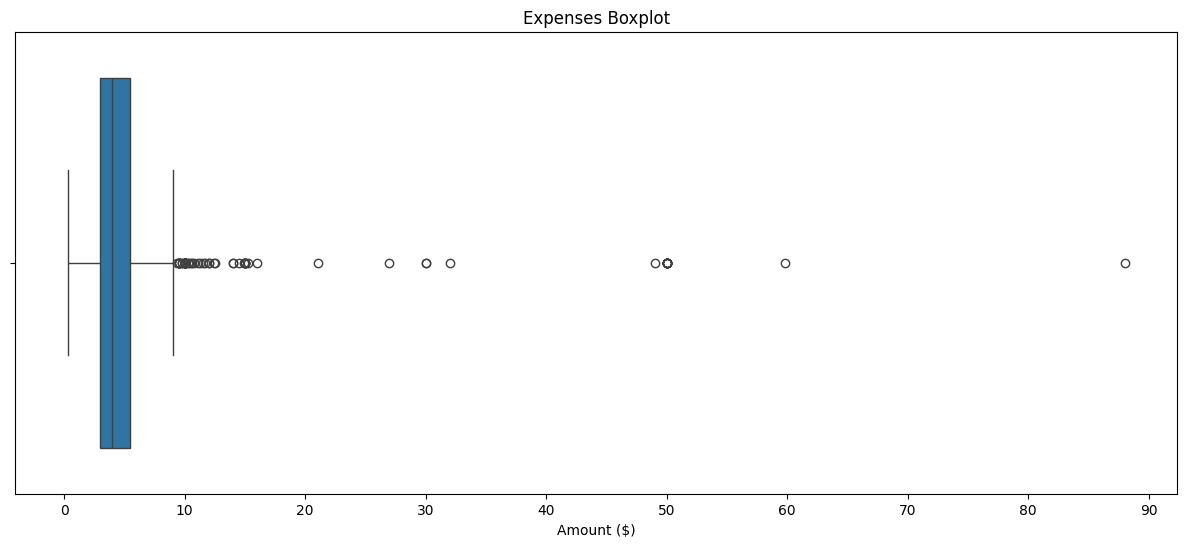

In [ ]:
# Boxplot for Expenses
plt.figure(figsize=(15,6))

BOXPLOT_EXPENSES = sns.boxplot(CASH_FLOW[CASH_FLOW['Income/Expenses'] == "Expenses"]['Amount'], orient = "y")

BOXPLOT_EXPENSES.set(
    xlabel = "Amount ($)",
    title = "Expenses Boxplot"
)

plt.xticks(np.arange(0, max(CASH_FLOW[CASH_FLOW['Income/Expenses'] == "Expenses"]['Amount']) + 10, 10))
fig.tight_layout()

In [ ]:
CASH_FLOW[CASH_FLOW['Income/Expenses'] == "Expenses"].sort_values(by = 'Amount', ascending = False).head(10)

,Date,Year,Month,Week,Day,Category,Item,Vendor,Vendor Location,District,Income/Expenses,Amount
502,2018-12-08,2018,12,W49,Saturday,Entertainment,Universal Studio Ticket,Blank,Blank,Blank,Expenses,88.0
366,2019-01-27,2019,1,W4,Sunday,Gift,Gift,Blank,Blank,Blank,Expenses,59.8
507,2018-12-07,2018,12,W49,Friday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
612,2018-10-31,2018,10,W44,Wednesday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
58,2019-05-12,2019,5,W19,Sunday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
558,2018-11-18,2018,11,W46,Sunday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
452,2018-12-25,2018,12,W52,Tuesday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
284,2019-02-28,2019,2,W9,Thursday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
170,2019-04-03,2019,4,W14,Wednesday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
121,2019-04-20,2019,4,W16,Saturday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0


In [ ]:
# Exclude Outliers for the Boxplot Visualization
CASH_FLOW_BOXPLOT = CASH_FLOW[(CASH_FLOW['Income/Expenses'] == "Expenses") & (CASH_FLOW["Category"]!="Entertainment") & (CASH_FLOW["Category"]!="Transportation") & (CASH_FLOW["Category"]!="Gift")].sort_values(by = 'Amount', ascending = False).head(10)
CASH_FLOW_BOXPLOT

,Date,Year,Month,Week,Day,Category,Item,Vendor,Vendor Location,District,Income/Expenses,Amount
283,2019-02-28,2019,2,W9,Thursday,Home,AC Service Fee for 4 Months,Blank,Blank,Blank,Expenses,30.0
247,2019-03-10,2019,3,W10,Sunday,Others,Others,Blank,Blank,Blank,Expenses,30.0
316,2019-02-17,2019,2,W7,Sunday,Food,Pizza,Pizza Hut,Westgate,Jurong East,Expenses,21.1
21,2019-05-23,2019,5,W21,Thursday,Groceries,Groceries,Cold Storage,Takashimaya,Orchard,Expenses,16.0
31,2019-05-20,2019,5,W21,Monday,Clothing,T-Shirt,Uniqlo,ION Orchard,Orchard,Expenses,15.0
461,2018-12-22,2018,12,W51,Saturday,Food,Cream & Hayashi Omelette Rice,OMU Rice,Suntec City,Promenade,Expenses,15.0
4,2019-05-28,2019,5,W22,Tuesday,Food,Korean BBQ,I Am Kim,Blank,Rochor,Expenses,15.0
173,2019-04-02,2019,4,W14,Tuesday,Clothing,Clothing,Uniqlo,ION Orchard,Orchard,Expenses,14.9
359,2019-01-29,2019,1,W5,Tuesday,Body Care,Lifebuoy's C.FRH BW HE 1L,Fairprice Finest,Clementi Mall,Clementi,Expenses,14.0
457,2018-12-24,2018,12,W52,Monday,Food,Pasta + Pizza,Loui's Pizza,Universal Studio,Harbourfront,Expenses,14.0


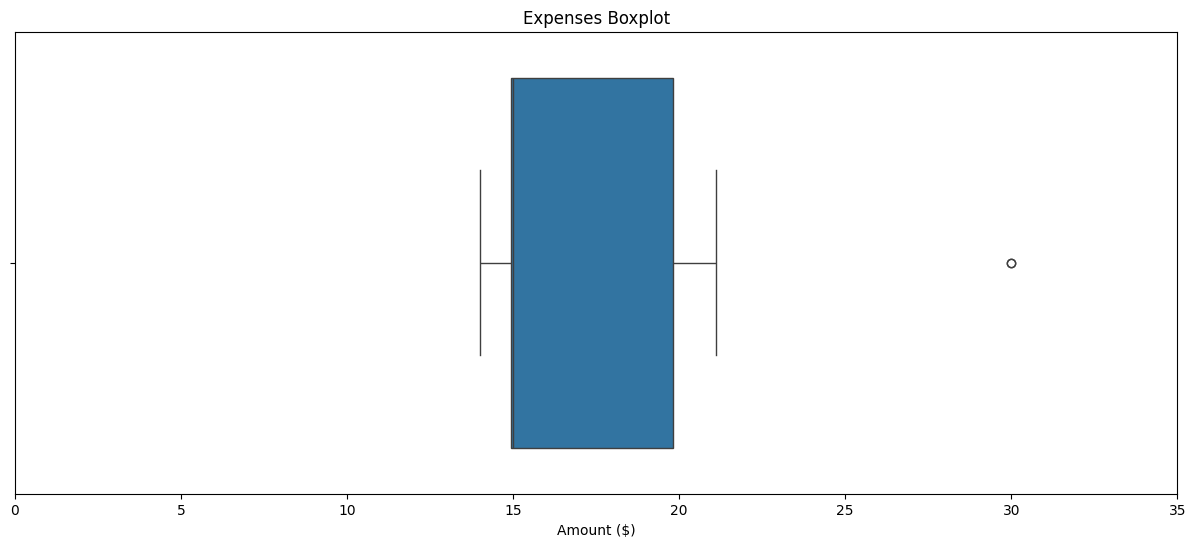

In [ ]:
# Boxplot for Expenses
plt.figure(figsize=(15,6))

BOXPLOT_EXPENSES = sns.boxplot(
    CASH_FLOW_BOXPLOT['Amount'], 
    orient = "y"
)

BOXPLOT_EXPENSES.set(
    xlabel = "Amount ($)",
    title = "Expenses Boxplot"
)

plt.xticks(np.arange(0, max(CASH_FLOW_BOXPLOT['Amount']) + 10, 5))
fig.tight_layout()